In [1]:
import numpy as np 
import pandas as pd 
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime
import math

In [2]:
def findMean(theData):
    count = 0
    myMean = float(0)
    for x in theData:
        myMean = myMean + float(x)
        count += 1
    myMean = myMean/count
    return myMean
# print(myMean)

In [3]:
def findSD(theData):
    count = 0
    mySD = float(0)
    mySums = 0
    mySquSums = 0 

    for x in theData:
        mySums = mySums + x
        mySquSums = mySquSums + (x **2 )
        count += 1
    mySD = math.sqrt(((count*mySquSums) - (mySums ** 2))/(count * (count-1)))
    return mySD
# print(mySD)

Finding the Mean and SD for my functions and with numpy

My mean: 0.016957579500076175 
Numpy mean: 0.016957579500076172
My SD: 0.99771087060097
Numpy SD: 0.9974614116970583


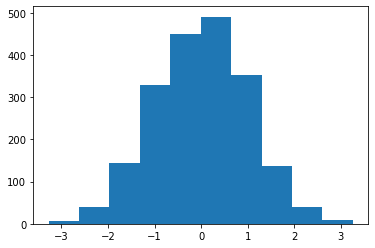

In [4]:
normalData = norm.rvs(loc = 0, scale = 1, size = 2000)
selfMean = findMean(normalData)
selfSD = findSD(normalData)
numMean = np.mean(normalData)
numSD = np.std(normalData)
print(f"My mean: {selfMean} ")
print(f"Numpy mean: {numMean}")
print(f"My SD: {selfSD}")
print(f"Numpy SD: {numSD}")

plt.hist(normalData)
plt.show()

Functions for Mean and standard deviation


In [5]:

rawData = pd.read_csv("2020Data.csv",usecols=[0,1], header=0, parse_dates=True, skip_blank_lines = True, index_col=0, skiprows=[0,2])
rawData = rawData.dropna()


print(rawData)

                       MC
2020-01-01 00:00:00  20.9
2020-01-01 01:00:00  22.7
2020-01-01 02:00:00  19.4
2020-01-01 03:00:00  20.8
2020-01-01 04:00:00  19.3
...                   ...
2020-12-31 19:00:00  19.6
2020-12-31 20:00:00  22.5
2020-12-31 21:00:00  24.0
2020-12-31 22:00:00  22.6
2020-12-31 23:00:00  24.8

[8757 rows x 1 columns]


In [6]:
data = pd.read_csv("2020Data.csv")
data = data[2:][['Unnamed: 0', 'BV']].dropna()
data['BV'] = pd.to_numeric(data['BV'])
data.head()


,Unnamed: 0,BV
2,1/1/2020 0:00,20.9
3,1/1/2020 1:00,22.7
4,1/1/2020 2:00,19.4
5,1/1/2020 3:00,20.8
6,1/1/2020 4:00,19.3


Adding Month and year col

In [7]:

data['month'] = list(map(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %H:%M").month, data['Unnamed: 0']))
data['hour'] = list(map(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %H:%M").hour, data['Unnamed: 0']))
data.head(100)



,Unnamed: 0,BV,month,hour
2,1/1/2020 0:00,20.9,1,0
3,1/1/2020 1:00,22.7,1,1
4,1/1/2020 2:00,19.4,1,2
5,1/1/2020 3:00,20.8,1,3
6,1/1/2020 4:00,19.3,1,4
...,...,...,...,...
97,1/4/2020 23:00,4.8,1,23
98,1/5/2020 0:00,6.5,1,0
99,1/5/2020 1:00,2.0,1,1
100,1/5/2020 2:00,3.3,1,2


In [8]:
# plt.plot(data['Unnamed: 0'],data['BV'])
# plt.show()

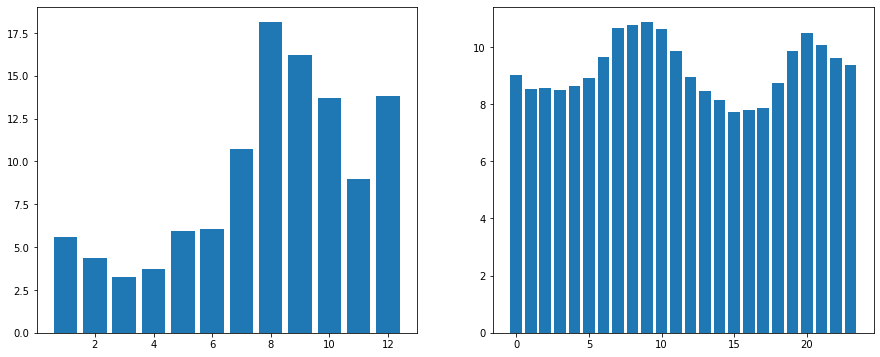

In [9]:
# monthData = data.groupby(by=['month']) 
# monthData.head()
    

result = data.groupby(by=['month'],as_index = False).mean()
result.head()

resultHR = data.groupby(by=['hour'],as_index=False).mean()
resultHR.head(23)

fig, subfigs = plt.subplots(1, 2, figsize=(15, 6))
subfigs[0].bar("month","BV",data = result)
subfigs[1].bar("hour","BV",data = resultHR)
plt.show()
   

Looking at the mean for the months( on the right) and the mean for he hour of day(on the left) it looks like the 
pollution is the weakest in the early part of the year and that dayly no matter the day the chances of the pollution
going up in the morning is high. 

<AxesSubplot:xlabel='month', ylabel='BV'>

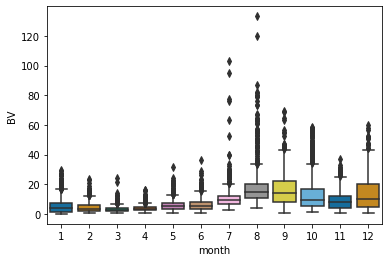

In [29]:
# fig, ax = plt.subplots()
import seaborn as sns
result.head()
sns.boxplot(y='BV', x='month', 
                 data=data, 
                 palette="colorblind")
# for x in result["hour"]:
# ax.set_xticklabels(result.keys())
# result.boxplot(column = "BV",rot=45, fontsize=12, figsize=(8,10))


The mean for the monthy values seem to be mostly lower then you would think with only a couple of values bring the 
mean up 

<AxesSubplot:xlabel='hour', ylabel='BV'>

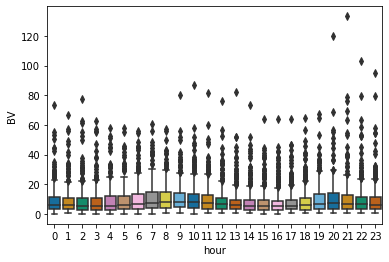

In [31]:
# resultHR.boxplot(column = "BV",rot=45, fontsize=12, figsize=(8,10))
sns.boxplot(y='BV', x='hour', 
                 data=data, 
                 palette="colorblind")

The mean for the hours values are about what I would expect. the discribution looks to be even for the chart so
there are no big outliers 